Практична робота 7 частина 1
Сорокін Олександр Віталійович ФІТ 4-6

Зчитати архів  Customer Shopping Trends Dataset  

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv(r"C:\Users\Italbey\Desktop\дз\мн\shopping_trends.csv", encoding='cp1251')
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


Перевірте розмір таблиці, наявність пропусків, тип стовпців. 

In [11]:
print("size", data.shape)
print("dtypes", data.dtypes)
print(data.isnull().sum())

size (3900, 19)
dtypes Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season   

Застосуйте алгоритм K-means для кластеризації даних

In [12]:
features = data[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
print(scaled_data)

wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,random_state=0, init='k-means++', max_iter=300, n_init=10).fit(scaled_data)
    wcss.append(kmean.inertia_)

[[ 0.71891344 -0.28562864 -0.90758357 -0.78583067]
 [-1.64862924  0.17885219 -0.90758357 -1.61655226]
 [ 0.39008807  0.55888195 -0.90758357 -0.16278948]
 ...
 [ 0.12702777 -1.13013923 -1.18686209 -0.09356268]
 [-0.00450238  0.72778407  0.06989124 -0.09356268]
 [ 0.52161822  0.89668619 -0.90758357  0.52947851]]


Побудова графіку методу ліктя

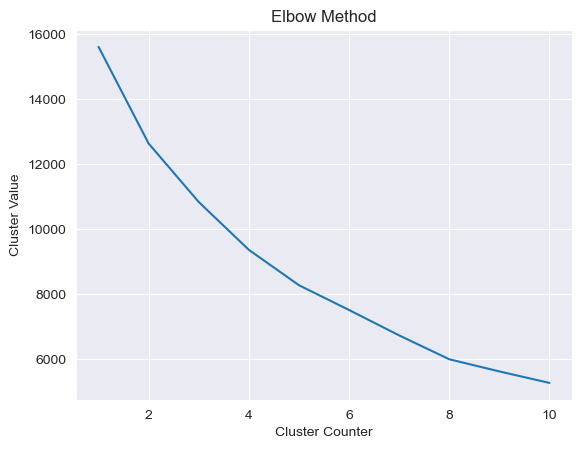

In [13]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Cluster Counter")
plt.ylabel("Cluster Value")

optimal_clust = 4
plt.show()

Кластеризація за допомогою K-means

In [14]:
kmean = KMeans(n_clusters=optimal_clust,random_state=0, init='k-means++', max_iter=300, n_init=10)
data['Cluster'] = kmean.fit_predict(scaled_data)

Візуалізація результатів

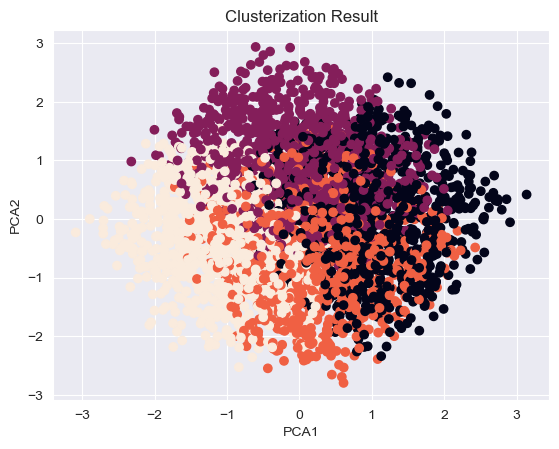

In [15]:
pca = PCA(n_components=2)
red_data = pca.fit_transform(scaled_data)
data['PCA1'] = red_data[:,0]
data['PCA2'] = red_data[:,1]

plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'])
plt.title('Clusterization Result')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Висновок: В ході даної лабораторної роботи був розглянутий метод  кластеризації для машинного навчання. Він дозволяє групувати дані в однорідні групи. Застосовували алгоритм K-means для кластеризації даних, побудову графіка методом "ліктя" та візуалізацію результатів кластеризації.